# Part 2: Visualizing patterns in the data
## Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify.

## Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

### Load the merged dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (Update path if needed)
file_path = "Data/SF_Crime_Data_Cleaned.csv"
df = pd.read_csv(file_path, parse_dates=["Incident Date"])

# Convert "Incident Time" to extract hours
df["Incident Time"] = pd.to_datetime(df["Incident Time"], format="%H:%M", errors="coerce").dt.hour
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS',
               'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
               'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE'}

df_focus = df[df["Incident Category"].isin(focuscrimes)]
df_focus.head()


,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Description,Police District,Latitude,Longitude
0,2004-11-22,17,Monday,ROBBERY,"ROBBERY, BODILY FORCE",INGLESIDE,37.708311,-122.420084
1,2005-10-18,20,Tuesday,VEHICLE THEFT,STOLEN AUTOMOBILE,PARK,90.000000,-120.500000
2,2004-02-15,2,Sunday,VEHICLE THEFT,STOLEN AUTOMOBILE,SOUTHERN,90.000000,-120.500000
4,2010-11-21,17,Sunday,ASSAULT,BATTERY,SOUTHERN,37.770913,-122.410541
5,2013-04-02,15,Tuesday,ASSAULT,BATTERY,TARAVAL,37.745158,-122.470366


## Weekly Patterns

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/265797675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Incident Day of Week"] = df_focus["Incident Day of Week"].str[:3]  # Extract first 3 letters
/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/265797675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Incident Day of Week"] = pd.Categorical(df_focus["Incident Day of Week"], categories=weekday_order, ordered=True)
/var/folders/lr/_ynnd4hs17b6vnn

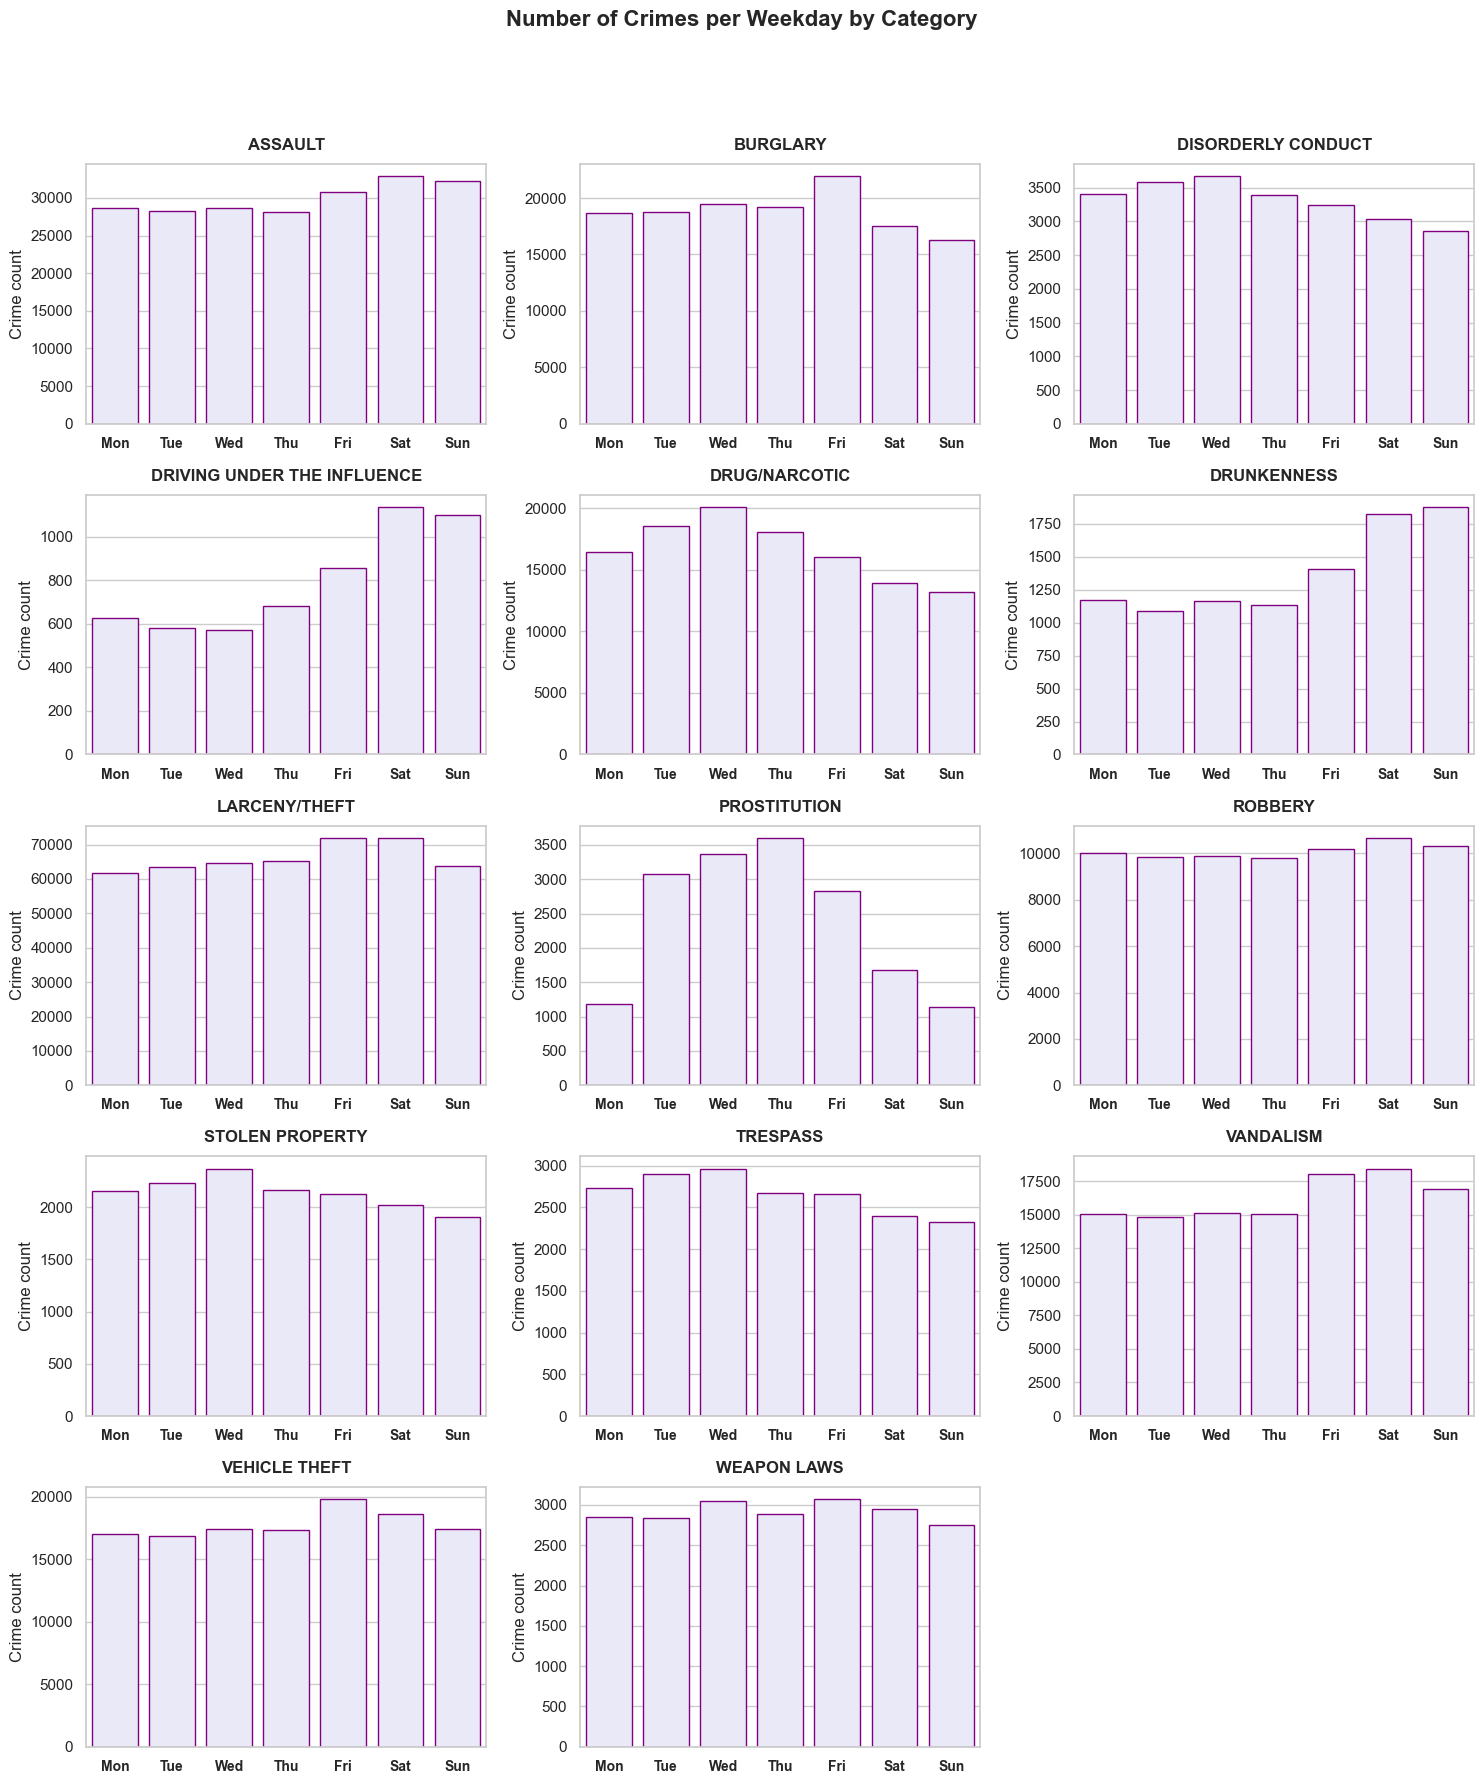

In [15]:
# Shorten weekday names to 3 letters
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df_focus["Incident Day of Week"] = df_focus["Incident Day of Week"].str[:3]  # Extract first 3 letters
df_focus["Incident Day of Week"] = pd.Categorical(df_focus["Incident Day of Week"], categories=weekday_order, ordered=True)

# Group data by weekday and crime category
df_weekly = df_focus.groupby(["Incident Day of Week", "Incident Category"]).size().reset_index(name="Count")

# Set up seaborn style
sns.set_theme(style="whitegrid")

# Create subplots dynamically
crime_types = df_weekly["Incident Category"].unique()
num_crimes = len(crime_types)
rows = (num_crimes // 3) + 1  

fig, axes = plt.subplots(rows, 3, figsize=(15, 18))  # Adjust figure size
axes = axes.flatten()

# Generate individual plots
for i, crime in enumerate(crime_types):
    ax = axes[i]
    crime_data = df_weekly[df_weekly["Incident Category"] == crime]
    
    sns.barplot(data=crime_data, x="Incident Day of Week", y="Count", ax=ax, color="lavender", edgecolor="purple")

    ax.set_title(crime, fontsize=12, fontweight="bold", pad=10)
    ax.set_xlabel("")
    ax.set_ylabel("Crime count")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight="bold")

# Remove empty subplots if crime count is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add overall title
plt.suptitle("Number of Crimes per Weekday by Category", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


## Monthly Patterns

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/633667790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Incident Month"] = df_focus["Incident Date"].dt.month
/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/633667790.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight="bold", rotation=45)
/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/633667790.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, f

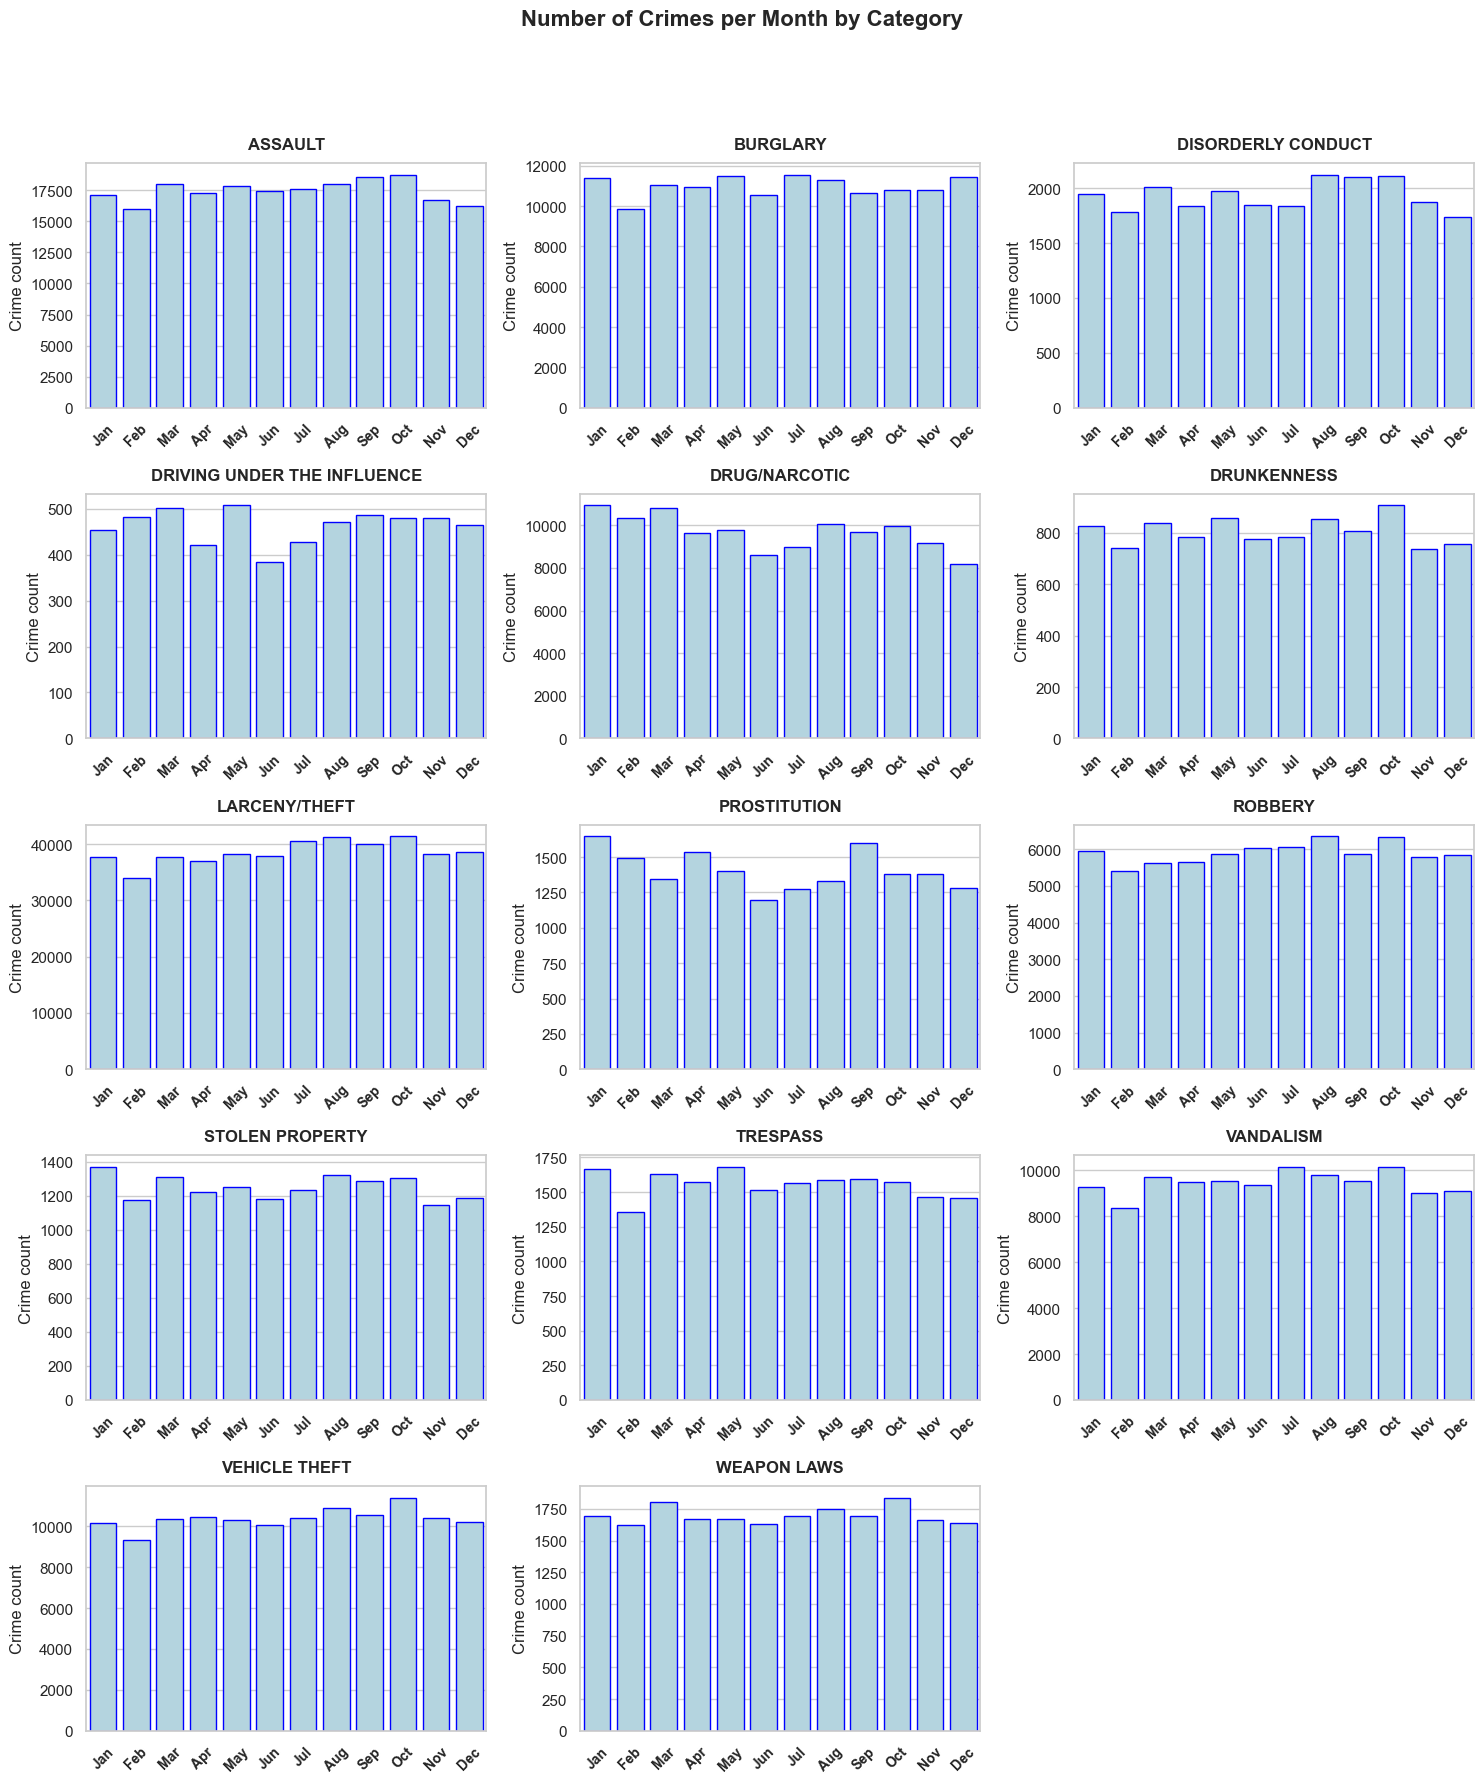

In [16]:
# Extract the month from the date
df_focus["Incident Month"] = df_focus["Incident Date"].dt.month

# Define month order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Group data by month and crime category
df_monthly = df_focus.groupby(["Incident Month", "Incident Category"]).size().reset_index(name="Count")
df_monthly["Incident Month"] = df_monthly["Incident Month"].apply(lambda x: month_order[x - 1])  # Convert to short names

# Set up seaborn style
sns.set_theme(style="whitegrid")

# Create subplots dynamically
crime_types = df_monthly["Incident Category"].unique()
num_crimes = len(crime_types)
rows = (num_crimes // 3) + 1  

fig, axes = plt.subplots(rows, 3, figsize=(15, 18))  # Adjust figure size
axes = axes.flatten()

# Generate individual plots
for i, crime in enumerate(crime_types):
    ax = axes[i]
    crime_data = df_monthly[df_monthly["Incident Category"] == crime]
    
    sns.barplot(data=crime_data, x="Incident Month", y="Count", ax=ax, color="lightblue", edgecolor="blue")

    ax.set_title(crime, fontsize=12, fontweight="bold", pad=10)
    ax.set_xlabel("")
    ax.set_ylabel("Crime count")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight="bold", rotation=45)

# Remove empty subplots if crime count is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add overall title
plt.suptitle("Number of Crimes per Month by Category", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## 24 hour cycle pattern

<Figure size 2000x800 with 0 Axes>

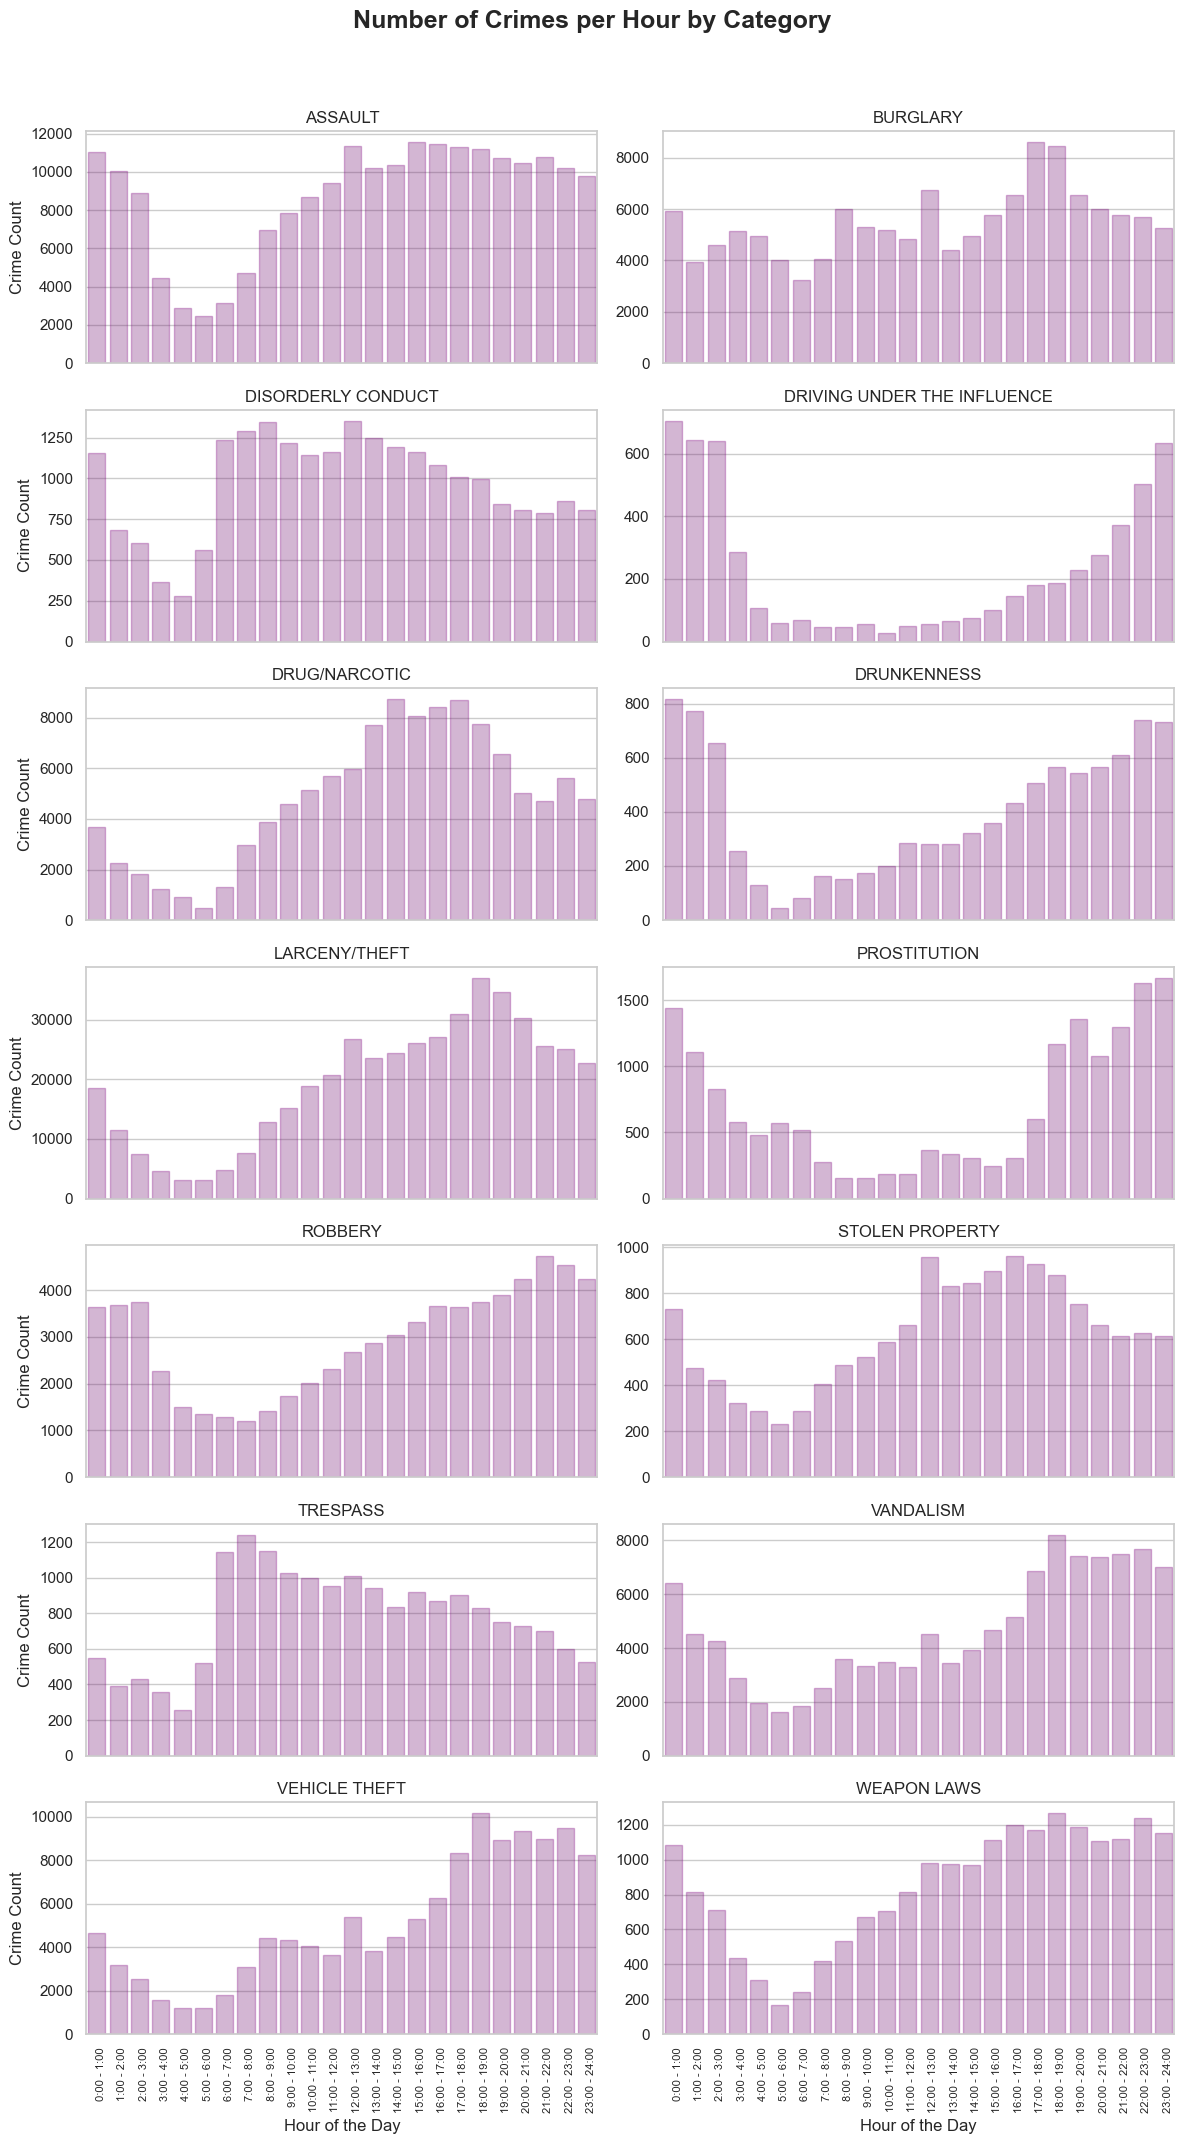

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

crime_hourly = df_focus.groupby(["Incident Time", "Incident Category"]).size().reset_index(name="Crime Count")
crime_hourly["Incident Time"] = crime_hourly["Incident Time"] + 1  
plt.figure(figsize=(20, 8))

g = sns.FacetGrid(crime_hourly, col="Incident Category", col_wrap=2, height=3, aspect=2, sharex=True, sharey=False, despine=False)
g.map_dataframe(sns.barplot, x="Incident Time", y="Crime Count", color="purple", alpha=0.3, edgecolor="purple")

# Formatting
g.set_axis_labels("Hour of the Day", "Crime Count")
g.set_titles("{col_name}")

# **Fix alignment of hour labels**
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(1, 25) - 0.8) 
    ax.set_xticklabels(
        [f"{h-1}:00 - {h}:00" if h > 1 else "0:00 - 1:00" for h in range(1, 25)],  
        fontsize=8, rotation=90, ha='center'  
    )

# Add overall title
plt.suptitle("Number of Crimes per Hour by Category", fontsize=18, fontweight="bold", y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


## Hours of the week pattern

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/3767558529.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Day Index"] = df_focus["Incident Day of Week"].map(day_to_index).astype(int)  # Convert to integer
/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_43664/3767558529.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Incident Time"] = df_focus["Incident Time"].astype(float)  # Convert to float if needed
/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/

<Figure size 1500x1000 with 0 Axes>

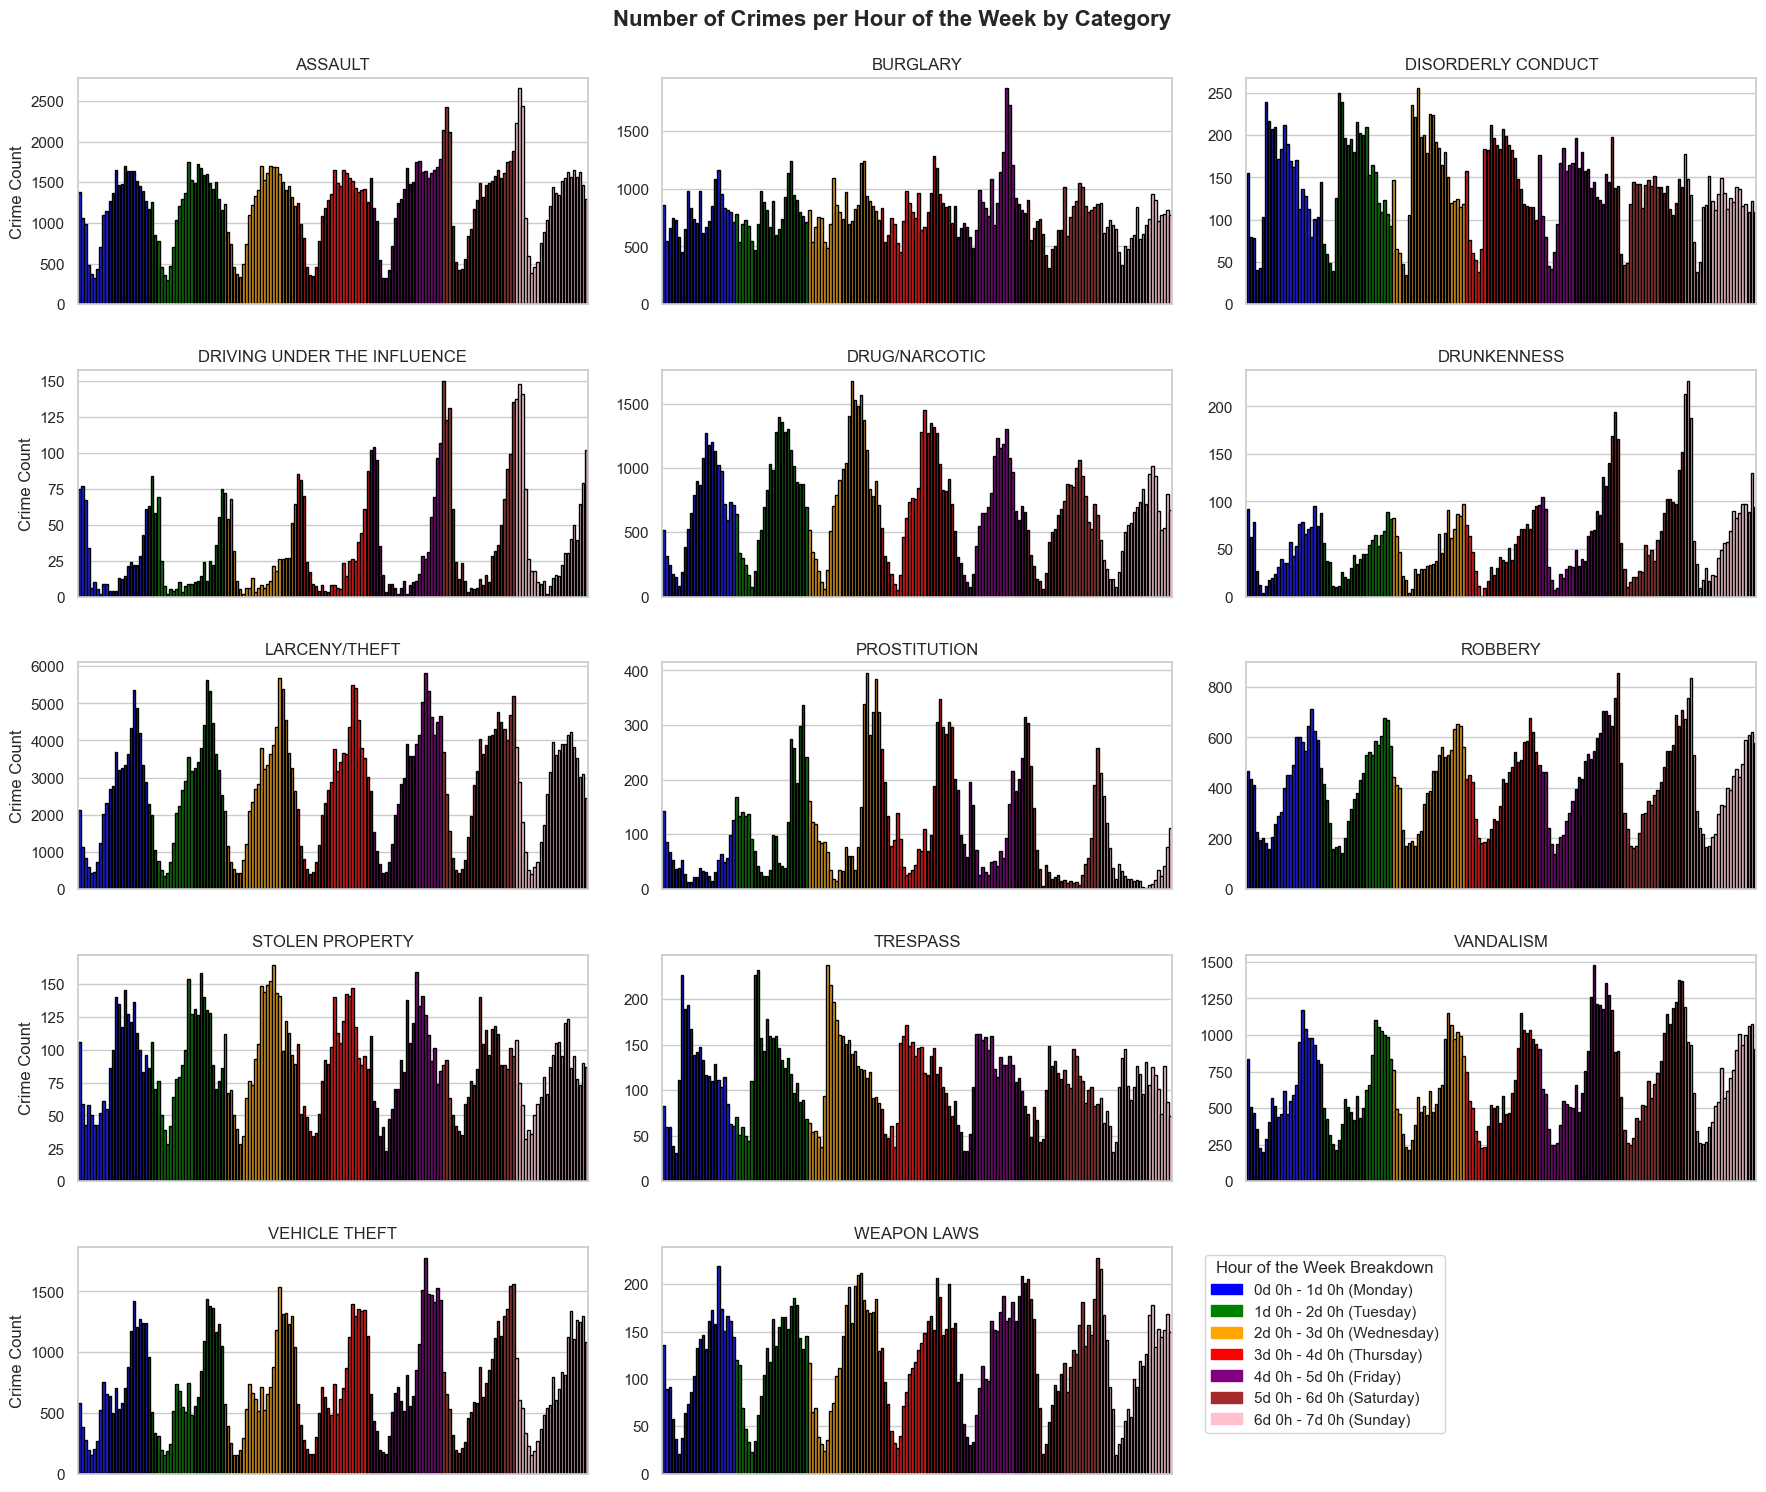

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a color palette for the 7 days of the week
day_colors = {
    0: "blue",    # Monday
    1: "green",   # Tuesday
    2: "orange",  # Wednesday
    3: "red",     # Thursday
    4: "purple",  # Friday
    5: "brown",   # Saturday
    6: "pink"     # Sunday
}

# Ensure "Day Index" is correctly computed as an integer
day_to_index = {"Mon": 0, "Tue": 1, "Wed": 2, "Thu": 3, "Fri": 4, "Sat": 5, "Sun": 6}
df_focus["Day Index"] = df_focus["Incident Day of Week"].map(day_to_index).astype(int)  # Convert to integer

# Ensure "Incident Time" is numeric
df_focus["Incident Time"] = df_focus["Incident Time"].astype(float)  # Convert to float if needed

# Compute "Hour of the Week" (0-167)
df_focus["Hour of the Week"] = df_focus["Day Index"] * 24 + df_focus["Incident Time"]

# Aggregate crime counts per hour of the week
crime_weekly = df_focus.groupby(["Hour of the Week", "Incident Category"]).size().reset_index(name="Crime Count")

# Map day of the week based on "Hour of the Week"
crime_weekly["Day Index"] = (crime_weekly["Hour of the Week"] // 24) % 7
crime_weekly["Color"] = crime_weekly["Day Index"].map(day_colors)  # Assign colors

# Set up the figure
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(crime_weekly, col="Incident Category", col_wrap=3, height=3, aspect=2, sharex=True, sharey=False, despine=False)

# Use barplot with color mapping
g.map_dataframe(
    sns.barplot, x="Hour of the Week", y="Crime Count", hue="Day Index",
    palette=day_colors, dodge=False, edgecolor="black"
)

# Formatting
g.set_axis_labels("Hour of the Week (0-167)", "Crime Count")
g.set_titles("{col_name}")
plt.suptitle("Number of Crimes per Hour of the Week by Category", fontsize=16, fontweight="bold", y=1.02)

# Remove x-axis labels since we have the legend
for ax in g.axes.flatten():  
    ax.set_xticklabels([])  # Remove labels
    ax.set_xlabel("")  # Remove axis title

# Update legend to show both days and time ranges
legend_labels = [
    "0d 0h - 1d 0h (Monday)", 
    "1d 0h - 2d 0h (Tuesday)", 
    "2d 0h - 3d 0h (Wednesday)", 
    "3d 0h - 4d 0h (Thursday)", 
    "4d 0h - 5d 0h (Friday)", 
    "5d 0h - 6d 0h (Saturday)", 
    "6d 0h - 7d 0h (Sunday)"
]
handles = [plt.Rectangle((0, 0), 1, 1, color=day_colors[i]) for i in range(7)]
plt.legend(handles, legend_labels, title="Hour of the Week Breakdown", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()
